<a href="https://colab.research.google.com/github/ishika-b/neural-networks/blob/main/nnfl_assn2_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn import  preprocessing
normalizer = StandardScaler()

In [ ]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

def relu(z):
  return np.maximum(z,1e-5)

def feed_forward(input, weights, bias):
   z = np.dot(weights, input) + bias
   a = sigmoid(z)
   return a

def feed_forward_relu(input, weights, bias):
   z = np.dot(weights, input) + bias
   a = sigmoid(z)
   return a

def error_y(actual, predicted):
    return np.subtract(predicted, actual)

def y_z(predicted):
    return predicted * (1 - predicted)

def error_deriv(actual,predicted):
    return np.multiply(np.subtract(predicted, actual), predicted * (1 - predicted))


In [ ]:
   def pretrain(x_train, y_train, hidden_size):
    alpha = 0.02
    input_size = x_train.shape[0] 
    output_size = x_train.shape[0]
    #hidden layer
    b3 = np.zeros((hidden_size, 1))
    w3 = np.random.rand(hidden_size, input_size)*0.001
    #output layer 
    b4 = np.zeros((output_size, 1))
    w4 = np.random.rand(output_size, hidden_size)*0.001

    for i in range(2000):
      #training function with backprop
      dJw4 = 0
      dJb4 = 0
      dJw3 = 0
      dJb3 = 0

      a3 = feed_forward(x_train, w3, b3) #(50,1503)
      a4 = feed_forward(a3, w4, b4) #(72,1503)

      dz4 = (a4-y_train)*(a4)*(1-a4) #72,1503 
      dJw4 = np.dot(dz4,a3.T) #(72,50)
      dJb4 = np.sum(dz4, axis=1, keepdims=True)
      da3 = np.dot(w4.T,dz4) #(72,50)T . (72,1503) = (50,1503)
      dz3 = da3*a3*(1-a3) #(50,1503)
      dJw3 = np.dot(dz3,x_train.T) #(50,1503)(72,1503) = (50,72)
      dJb3 = np.sum(dz3,axis=1, keepdims=True) 

      w3 = w3 - (1/X_train.shape[1])*alpha*dJw3
      w4 = w4 - (1/X_train.shape[1])*alpha*dJw4
      b3 = b3 - (1/X_train.shape[1])*alpha*dJb3
      b4 = b4 - (1/X_train.shape[1])*alpha*dJb4
      
      error = y_train - a4 # y_train: (72, 1503) a4:(72, 1503)
      error = np.square(error)
      error = np.sum(error)
      error = (1/y_train.shape[1])*np.sqrt(error)
      #print(error)
    return w3, b3, a3

In [ ]:
if __name__ == '__main__':
  np.random.seed(0)

  mat = scipy.io.loadmat('/content/drive/My Drive/nnfl/nnfl2/data5.mat')

  #preparing features and labels as python arrays
  X = mat['x'][:,[i for i in range(72)]]
  y = mat['x'][:,72]

  for i in range(X.shape[1]):
    mean = np.mean(X[:,i]) 
    std = np.std(X[:,i])
    X[:,i] = [(a-mean)/std for a in X[:,i]]

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  X_train, Z_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=1)


  #print(X)
  #print(y)

  h1_size = 50
  h2_size = 30
  h3_size = 10

  weights_1, bias_1, H1 = pretrain(X_train.T, X_train.T, h1_size)
  weights_2, bias_2, H2 = pretrain(H1, H1, h2_size)
  weights_3, bias_3, H3 = pretrain(H2, H2, h3_size)

  #classification layer
  #output_weights, output_bias, output = pretrain(H3, H3, 1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
  w1 = weights_1
  b1 = bias_1
  w2 = weights_2
  b2 = bias_2
  w3 = weights_3
  b3 = bias_3

  alpha = 0.9
  
  b4 = np.zeros((1, 1)) #(1,1)
  w4 = np.random.rand(1, h3_size)*0.01 #(1,10)

  costs_tr = []
  #FINETUNE
  for i in range(8000):
    cost = 0
    dJw1=0
    dJw2=0
    dJw3=0
    dJw4=0
    dJb1=0
    dJb2=0
    dJb3=0
    dJb4=0
    for j in range(X_train.shape[0]):
      #FORWARDPROP
      x_ = X_train[j,:].reshape(72,1)
      z1 = np.dot(w1,x_)+b1
      a1 = sigmoid(z1)
      z2 = np.dot(w2,a1)+b2
      a2 = sigmoid(z2)
      z3 = np.dot(w3,a2)+b3
      a3 = sigmoid(z3)
      z4 = np.dot(w4,a3)+b4
      a4 = sigmoid(z4)
      cost += np.squeeze((y_train[j]-a4)**2)
      #BACKPROP 
      dz4 = (a4)*(1-a4.T)*(a4-y_train[j])
      dJw4 += np.dot(dz4,a3.T)
      dJb4 += dz4
      da3 = np.dot(w4.T,dz4)
      dz3 = np.multiply(da3,(a3*(1-a3)))
      dJw3 += np.dot(dz3,a2.T)
      dJb3 += dz3
      da2 = np.dot(w3.T,dz3)
      dz2 = np.multiply(da2,(a2*(1-a2)))
      dJw2 += np.dot(dz2,a1.T)
      dJb2 += dz2
      da1 = np.dot(w2.T,dz2)
      dz1 = np.multiply(da1,(a1*(1-a1)))
      dJw1 += np.dot(dz1,x_.T)
      dJb1 += dz1
    #print(i,cost/X_train.shape[0])
    #WEIGHT UPDATE
    w1 = w1 - (1/X_train.shape[0])*alpha*dJw1
    w2 = w2 - (1/X_train.shape[0])*alpha*dJw2
    w3 = w3 - (1/X_train.shape[0])*alpha*dJw3
    w4 = w4 - (1/X_train.shape[0])*alpha*dJw4
    b1 = b1 - (1/X_train.shape[0])*alpha*dJb1
    b2 = b2 - (1/X_train.shape[0])*alpha*dJb2
    b3 = b3 - (1/X_train.shape[0])*alpha*dJb3
    b4 = b4 - (1/X_train.shape[0])*alpha*dJb4
    costs_tr.append(cost)

In [ ]:
  w1_val = weights_1
  b1_val = bias_1
  w2_val = weights_2
  b2_val = bias_2
  w3_val = weights_3
  b3_val = bias_3

  alpha = 0.9
  
  b4_val = np.zeros((1, 1)) #(1,1)
  w4_val = np.random.rand(1, h3_size)*0.01 #(1,10)

  costs_val = []
  #FINETUNE
  for i in range(8000):
    cost = 0
    dJw1=0
    dJw2=0
    dJw3=0
    dJw4=0
    dJb1=0
    dJb2=0
    dJb3=0
    dJb4=0
    for j in range(Z_val.shape[0]): #X_val is loaded as Z_val
      #FORWARDPROP
      x_ = Z_val[j,:].reshape(72,1)
      z1 = np.dot(w1_val,x_)+b1_val
      a1 = sigmoid(z1)
      z2 = np.dot(w2_val,a1)+b2_val
      a2 = sigmoid(z2)
      z3 = np.dot(w3_val,a2)+b3_val
      a3 = sigmoid(z3)
      z4 = np.dot(w4_val,a3)+b4_val
      a4 = sigmoid(z4)
      cost += np.squeeze((y_val[j]-a4)**2)
      #BACKPROP 
      dz4 = (a4)*(1-a4.T)*(a4-y_val[j])
      dJw4 += np.dot(dz4,a3.T)
      dJb4 += dz4
      da3 = np.dot(w4_val.T,dz4)
      dz3 = np.multiply(da3,(a3*(1-a3)))
      dJw3 += np.dot(dz3,a2.T)
      dJb3 += dz3
      da2 = np.dot(w3_val.T,dz3)
      dz2 = np.multiply(da2,(a2*(1-a2)))
      dJw2 += np.dot(dz2,a1.T)
      dJb2 += dz2
      da1 = np.dot(w2_val.T,dz2)
      dz1 = np.multiply(da1,(a1*(1-a1)))
      dJw1 += np.dot(dz1,x_.T)
      dJb1 += dz1
    #print(i,cost/X_train.shape[0])
    #WEIGHT UPDATE
    w1_val = w1_val - (1/Z_val.shape[0])*alpha*dJw1
    w2_val = w2_val - (1/Z_val.shape[0])*alpha*dJw2
    w3_val = w3_val - (1/Z_val.shape[0])*alpha*dJw3
    w4_val = w4_val - (1/Z_val.shape[0])*alpha*dJw4
    b1_val = b1_val - (1/Z_val.shape[0])*alpha*dJb1
    b2_val = b2_val - (1/Z_val.shape[0])*alpha*dJb2
    b3_val = b3_val - (1/Z_val.shape[0])*alpha*dJb3
    b4_val = b4_val - (1/Z_val.shape[0])*alpha*dJb4
    costs_val.append(cost)

final train cost: 4.5943820126031375e-10
final validation cost: 1.0202225228998686e-07


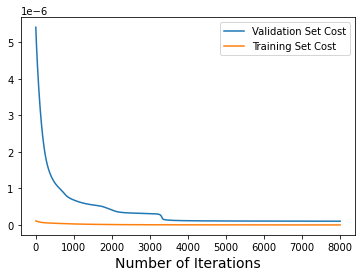

In [ ]:
  costs_val = (1/215)*np.array(costs_val)
  costs_tr = (1/1503)*np.array(costs_tr)

  import matplotlib.pyplot as plt
  fig = plt.figure()
  plt.xlabel('Number of Iterations', fontsize=14)
  plt.plot(range(0,8000),(costs_val), label = 'Validation Set Cost')
  plt.plot(range(0,8000),(costs_tr), label = 'Training Set Cost')
  plt.legend()

  print("final train cost:", costs_tr[-1])
  print("final validation cost:",costs_val[-1])

In [ ]:
  out_1 = feed_forward(X_test.T, w1, b1)
  out_2 = feed_forward(out_1, w2, b2)
  out_3 = feed_forward(out_2, w3, b3)
  
  y_pred = np.dot(out_3.T, w4.T) + b4
  preprocessing.minmax_scale(y_pred, feature_range=(0, 1), copy=False)
  #print(y_pred)

  preds = []
  for i in range(len(y_test)):
      if (y_pred[i] < 0.5):
          preds.append(0)
      else:
          preds.append(1)
  print("Accuracy ->",accuracy_score(y_test, preds))

Accuracy -> 0.9232558139534883


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
print("class 0 accuracy:", cm[0,0]/(cm[0,0]+cm[0,1]))
print("class 1 accuracy:",cm[1,1]/(cm[1,1]+cm[1,0]))

class 0 accuracy: 0.8962264150943396
class 1 accuracy: 0.9495412844036697
